In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd

In [2]:
place = "Pl. Charles de Gaulle, 75008 Paris"
G = ox.graph_from_address(place, network_type="drive")
G_proj = ox.project_graph(G)

In [3]:
stats = ox.basic_stats(G)
stats["circuity_avg"]

1.0178728244384512

In [4]:
# get the street network for a place, and its area in square meters
city = ox.geocode_to_gdf(place)
city_proj = ox.project_gdf(city)
area = city_proj.unary_union.area
area

c:\users\jietu\appdata\local\programs\python\python39\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


4925.131622348568

In [5]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
pd.Series(stats)

n                                                                             516
m                                                                            1024
k_avg                                                                    3.968992
edge_length_total                                                       85879.122
edge_length_avg                                                          83.86633
streets_per_node_avg                                                         3.25
streets_per_node_counts         {0: 0, 1: 18, 2: 14, 3: 320, 4: 150, 5: 13, 6: 1}
streets_per_node_proportions    {0: 0.0, 1: 0.03488372093023256, 2: 0.02713178...
intersection_count                                                            498
street_length_total                                                     67396.171
street_segment_count                                                          791
street_length_avg                                                       85.203756
circuity_avg    

In [6]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats["streets_per_node_counts"].items():
    stats["{}way_int_count".format(k)] = count
for k, proportion in stats["streets_per_node_proportions"].items():
    stats["{}way_int_prop".format(k)] = proportion

# delete the no longer needed dict elements
del stats["streets_per_node_counts"]
del stats["streets_per_node_proportions"]

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats, name="value")).round(3)

,value
n,5.160000e+02
m,1.024000e+03
k_avg,3.969000e+00
edge_length_total,8.587912e+04
edge_length_avg,8.386600e+01
streets_per_node_avg,3.250000e+00
intersection_count,4.980000e+02
street_length_total,6.739617e+04
street_segment_count,7.910000e+02
street_length_avg,8.520400e+01


In [7]:
# calculate betweenness with a digraph of G (ie, no parallel edges)
bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

(21660969, 0.2205394582750935)

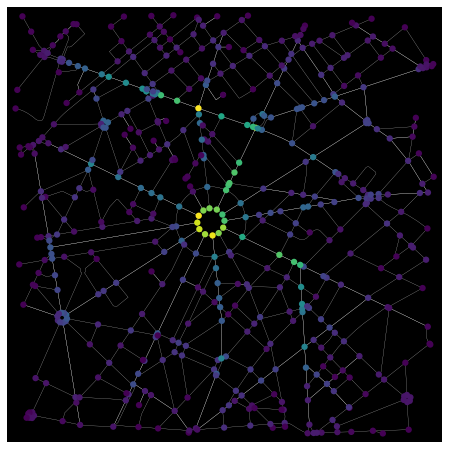

In [9]:
# add the betweenness centrality values as new node attributes, then plot
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="viridis")
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=40,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
    bgcolor="k",
)